# Model Predicting the Winner after the First Inning with Binning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix, classification_report
pd.set_option('display.max_columns', None)

C:\Users\SK\anaconda3\envs\NN\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
r_data = pd.read_pickle('./data/pjt03_specific_data.pkl')
data = r_data.copy()
data.head()

,team,neutral_venue,home_venue,toss_winner,max_balls_first,balls,byes,leg_byes,no_balls,wides,runs,wickets,max_balls_second,target,derby,start_month,month_02,month_12,victor
4,Perth Scorchers,0,1,1,120,120,0,2,0,3,144,7,120,145.0,0,01,0,0,1
8,Brisbane Heat,0,1,0,120,120,2,0,1,2,164,8,120,165.0,0,12,0,1,1
12,Sydney Thunder,0,1,0,120,120,2,2,0,1,106,8,120,107.0,0,01,0,0,0
13,Brisbane Heat,0,1,0,120,120,0,0,0,3,198,6,120,199.0,0,01,0,0,1
16,Sydney Thunder,0,1,0,120,102,0,0,0,3,77,7,102,82.0,0,01,0,0,0


In [3]:
# Descriptive statistics
df = data[['max_balls_first', 'balls', 'byes', 'leg_byes', 'no_balls', 'wides', 'runs', 'wickets', 'max_balls_second', 'target']].describe()
df

,max_balls_first,balls,byes,leg_byes,no_balls,wides,runs,wickets,max_balls_second,target
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,119.261146,118.346072,0.668790,2.354565,0.430998,4.123142,160.745223,6.256900,117.859873,160.598726
std,5.198789,7.299168,1.192469,2.087342,0.725680,2.897856,28.018589,2.046229,10.625817,29.328265
min,48.000000,48.000000,0.000000,0.000000,0.000000,0.000000,69.000000,1.000000,30.000000,51.000000
25%,120.000000,120.000000,0.000000,1.000000,0.000000,2.000000,144.000000,5.000000,120.000000,144.000000
50%,120.000000,120.000000,0.000000,2.000000,0.000000,4.000000,163.000000,6.000000,120.000000,163.000000
75%,120.000000,120.000000,1.000000,3.000000,1.000000,5.500000,178.500000,8.000000,120.000000,179.000000
max,120.000000,120.000000,8.000000,15.000000,5.000000,22.000000,273.000000,10.000000,120.000000,274.000000


In [4]:
# Save the stats table
# dfi.export(df, './figure/description.png')

# Binning

In [5]:
# Max_balls
data['max_balls_first'].value_counts()
data['max_balls_first'] = np.where(data['max_balls_first']<100, 1, 
                    np.where((100<=data['max_balls_first'])&(data['max_balls_first']<110), 2, 
                    np.where((110<=data['max_balls_first'])&(data['max_balls_first']<120), 3,
                    np.where(data['max_balls_first'] == 120, 4, data['max_balls_first']))))
data.head()

,team,neutral_venue,home_venue,toss_winner,max_balls_first,balls,byes,leg_byes,no_balls,wides,runs,wickets,max_balls_second,target,derby,start_month,month_02,month_12,victor
4,Perth Scorchers,0,1,1,4,120,0,2,0,3,144,7,120,145.0,0,01,0,0,1
8,Brisbane Heat,0,1,0,4,120,2,0,1,2,164,8,120,165.0,0,12,0,1,1
12,Sydney Thunder,0,1,0,4,120,2,2,0,1,106,8,120,107.0,0,01,0,0,0
13,Brisbane Heat,0,1,0,4,120,0,0,0,3,198,6,120,199.0,0,01,0,0,1
16,Sydney Thunder,0,1,0,4,102,0,0,0,3,77,7,102,82.0,0,01,0,0,0


In [6]:
data['max_balls_first'].value_counts()

4    457
1      7
2      5
3      2
Name: max_balls_first, dtype: int64

* **Balls** 0-99: 1, 100-109: 2, 110-119: 3, 120: 4

In [7]:
# Balls
data['balls'].value_counts()
data['balls'] = np.where(data['balls']<100, 1, 
                np.where((100<=data['balls'])&(data['balls']<110), 2, 
                np.where((110<=data['balls'])&(data['balls']<120), 3,
                np.where(data['balls'] == 120, 4, data['balls']))))
data.head()

,team,neutral_venue,home_venue,toss_winner,max_balls_first,balls,byes,leg_byes,no_balls,wides,runs,wickets,max_balls_second,target,derby,start_month,month_02,month_12,victor
4,Perth Scorchers,0,1,1,4,4,0,2,0,3,144,7,120,145.0,0,01,0,0,1
8,Brisbane Heat,0,1,0,4,4,2,0,1,2,164,8,120,165.0,0,12,0,1,1
12,Sydney Thunder,0,1,0,4,4,2,2,0,1,106,8,120,107.0,0,01,0,0,0
13,Brisbane Heat,0,1,0,4,4,0,0,0,3,198,6,120,199.0,0,01,0,0,1
16,Sydney Thunder,0,1,0,4,2,0,0,0,3,77,7,102,82.0,0,01,0,0,0


In [8]:
data['balls'].value_counts()

4    424
3     23
1     13
2     11
Name: balls, dtype: int64

In [9]:
# Runs
data['runs'] = np.where(data['runs']<120, 1, 
               np.where((120<=data['runs'])&(data['runs']<160), 2, 
               np.where((160<=data['runs'])&(data['runs']<200), 3,
               np.where(data['runs']>=200, 4, data['runs']))))
data.head()

,team,neutral_venue,home_venue,toss_winner,max_balls_first,balls,byes,leg_byes,no_balls,wides,runs,wickets,max_balls_second,target,derby,start_month,month_02,month_12,victor
4,Perth Scorchers,0,1,1,4,4,0,2,0,3,2,7,120,145.0,0,01,0,0,1
8,Brisbane Heat,0,1,0,4,4,2,0,1,2,3,8,120,165.0,0,12,0,1,1
12,Sydney Thunder,0,1,0,4,4,2,2,0,1,1,8,120,107.0,0,01,0,0,0
13,Brisbane Heat,0,1,0,4,4,0,0,0,3,3,6,120,199.0,0,01,0,0,1
16,Sydney Thunder,0,1,0,4,2,0,0,0,3,1,7,102,82.0,0,01,0,0,0


In [10]:
data['runs'].value_counts()

3    220
2    179
1     37
4     35
Name: runs, dtype: int64

In [11]:
# Max_balls_second
data['max_balls_second'].value_counts()
data['max_balls_second'] = np.where(data['max_balls_second']<100, 1, 
                           np.where((100<=data['max_balls_second'])&(data['max_balls_second']<110), 2, 
                           np.where((110<=data['max_balls_second'])&(data['max_balls_second']<120), 3,
                           np.where(data['max_balls_second'] == 120, 4, data['max_balls_second']))))
data.head()

,team,neutral_venue,home_venue,toss_winner,max_balls_first,balls,byes,leg_byes,no_balls,wides,runs,wickets,max_balls_second,target,derby,start_month,month_02,month_12,victor
4,Perth Scorchers,0,1,1,4,4,0,2,0,3,2,7,4,145.0,0,01,0,0,1
8,Brisbane Heat,0,1,0,4,4,2,0,1,2,3,8,4,165.0,0,12,0,1,1
12,Sydney Thunder,0,1,0,4,4,2,2,0,1,1,8,4,107.0,0,01,0,0,0
13,Brisbane Heat,0,1,0,4,4,0,0,0,3,3,6,4,199.0,0,01,0,0,1
16,Sydney Thunder,0,1,0,4,2,0,0,0,3,1,7,2,82.0,0,01,0,0,0


In [12]:
data['max_balls_second'].value_counts()

4    444
1     18
2      6
3      3
Name: max_balls_second, dtype: int64

In [13]:
# Target
data['target'] = np.where(data['target']<120, 1, 
                 np.where((120<=data['target'])&(data['target']<160), 2, 
                 np.where((160<=data['target'])&(data['target']<200), 3,
                 np.where(data['target']>=200, 4, data['target']))))
data.head()

,team,neutral_venue,home_venue,toss_winner,max_balls_first,balls,byes,leg_byes,no_balls,wides,runs,wickets,max_balls_second,target,derby,start_month,month_02,month_12,victor
4,Perth Scorchers,0,1,1,4,4,0,2,0,3,2,7,4,2.0,0,01,0,0,1
8,Brisbane Heat,0,1,0,4,4,2,0,1,2,3,8,4,3.0,0,12,0,1,1
12,Sydney Thunder,0,1,0,4,4,2,2,0,1,1,8,4,1.0,0,01,0,0,0
13,Brisbane Heat,0,1,0,4,4,0,0,0,3,3,6,4,3.0,0,01,0,0,1
16,Sydney Thunder,0,1,0,4,2,0,0,0,3,1,7,2,1.0,0,01,0,0,0


In [14]:
data['target'].value_counts()

3.0    218
2.0    177
1.0     40
4.0     36
Name: target, dtype: int64

In [15]:
data.dtypes

team                 object
neutral_venue         int64
home_venue            int64
toss_winner           int64
max_balls_first       int64
balls                 int64
byes                  int64
leg_byes              int64
no_balls              int64
wides                 int64
runs                  int64
wickets               int64
max_balls_second      int64
target              float64
derby                 int64
start_month          object
month_02              uint8
month_12              uint8
victor                int64
dtype: object

# Exploratory Data Analysis

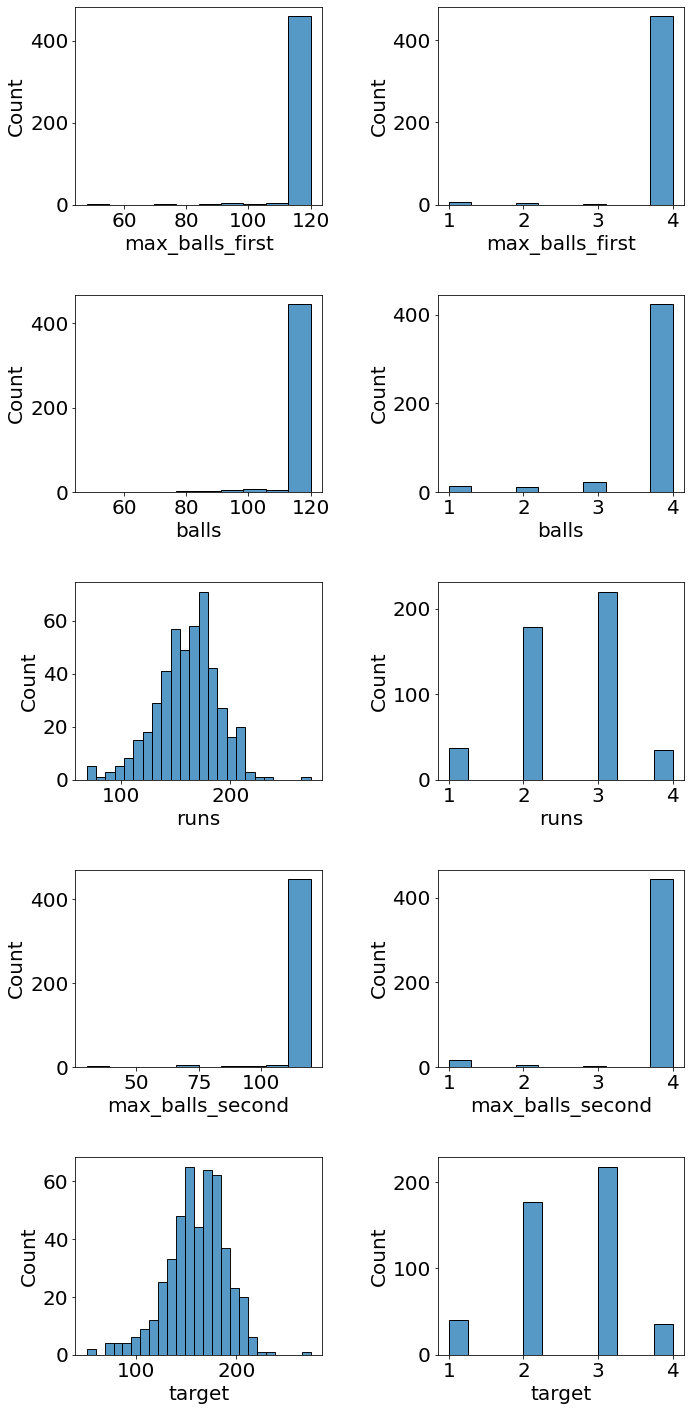

In [16]:
# Max_balls_first
plt.figure(figsize=(10, 20))
plt.rc('font', size=20)
# sns.set(font_scale=1.5)

plt.subplot(5, 2, 1)
sns.histplot(r_data['max_balls_first'])
plt.subplot(5, 2, 2)
sns.histplot(data['max_balls_first'])

# Balls
plt.subplot(5, 2, 3)
sns.histplot(r_data['balls'])
plt.subplot(5, 2, 4)
sns.histplot(data['balls'])

# Runs
plt.subplot(5, 2, 5)
sns.histplot(r_data['runs'])
plt.subplot(5, 2, 6)
sns.histplot(data['runs'])

# Max_balls_second
plt.subplot(5, 2, 7)
sns.histplot(r_data['max_balls_second'])
plt.subplot(5, 2, 8)
sns.histplot(data['max_balls_second'])

# Target
plt.subplot(5, 2, 9)
sns.histplot(r_data['target'])
plt.subplot(5, 2, 10)
sns.histplot(data['target'])

plt.tight_layout(h_pad=2, w_pad=2)    # Adjust margin between subplots
plt.show()

# Classification Analysis

## Logistic Regression
Numeric features

### Train/Test split
- **Continuous variable**: standardized 
- **Ordinal variable**: numeric as it is
- **Nominal variable**: onehot-encoding

In [18]:
X = data[['neutral_venue', 'home_venue', 'toss_winner', 'max_balls_first','balls', 'byes', 'leg_byes', 'no_balls', 
          'wides', 'runs', 'wickets', 'max_balls_second', 'target', 'derby', 'month_02', 'month_12']]
y = data['victor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train data scaling
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train[['byes', 'leg_byes', 'no_balls', 'wides', 'wickets']])
X_train.loc[:, ['byes', 'leg_byes', 'no_balls', 'wides', 'wickets']] = X_train_tr

# Test dat scaling
X_test_tr = scaler.transform(X_test[['byes', 'leg_byes', 'no_balls', 'wides', 'wickets']])
X_test.loc[:, ['byes', 'leg_byes', 'no_balls', 'wides', 'wickets']] = X_test_tr

# Scaling for total dataset
ct = make_column_transformer((StandardScaler(), ['byes', 'leg_byes', 'no_balls', 'wides', 'wickets']), remainder='passthrough')
X_sc = ct.fit_transform(X)

X_train.shape, y_test.shape

((376, 16), (95,))

### Permutation importance

**Solver = 'liblinear'**

In [18]:
logr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
result = permutation_importance(logr, X_train, y_train, scoring='f1', n_repeats=10, random_state=0)

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(i, X_train.columns[i], result.importances_mean[i])

9 runs 0.12787402169077589
12 target 0.050178968735194854
11 max_balls_second 0.011551874117497174
8 wides 0.00405005177504697


In [19]:
# Use feature 9, 10, 12, 13
X_9101213 = X.iloc[:, [8, 9, 11, 12]]
ct = make_column_transformer((StandardScaler(), ['wides']), remainder='passthrough')
pl = make_pipeline(ct, LogisticRegression(solver='liblinear'))
cross_validate(pl, X_9101213, y, cv=10, scoring='f1')['test_score'].mean()

0.7373555790572467

**Solver = 'lbfgs'**

In [20]:
logr = LogisticRegression().fit(X_train, y_train)
result = permutation_importance(logr, X_train, y_train, scoring='f1', n_repeats=10, random_state=0)

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(i, X_train.columns[i], result.importances_mean[i])

9 runs 0.11995359021918899
12 target 0.04783013061011258
11 max_balls_second 0.007264043219873062
8 wides 0.0037508642901374787


In [21]:
# Use feature 9, 10, 12, 13
X_9101213 = X.iloc[:, [8, 9, 11, 12]]
ct = make_column_transformer((StandardScaler(), ['wides']), remainder='passthrough')
pl = make_pipeline(ct, LogisticRegression())
cross_validate(pl, X_9101213, y, cv=10, scoring='f1')['test_score'].mean()

0.7270497610357951

### Sequential feature selection

**Solver = 'liblinear'**

In [22]:
logr = LogisticRegression(solver='liblinear')
sfs = SequentialFeatureSelector(logr, n_features_to_select='auto', tol=0.001, scoring='f1', cv=10)

# Selection is done with train data, but the selected features will be used for train and test
sfs.fit(X_train, y_train)
X_tr = sfs.transform(X)  
sfs.get_feature_names_out()

array(['max_balls_first', 'runs'], dtype=object)

In [23]:
# Selected features doesn't need scaling
cross_validate(logr, X_tr, y, cv=10, scoring='f1')['test_score'].mean()

0.7433115356284479

**Solver = lbfgs'**

In [24]:
logr = LogisticRegression()
sfs = SequentialFeatureSelector(logr, n_features_to_select='auto', tol=0.001, scoring='f1', cv=10)

# Selection is done with train data, but the selected features will be used for train and test
sfs.fit(X_train, y_train)
X_tr = sfs.transform(X)  
sfs.get_feature_names_out()

array(['runs'], dtype=object)

In [25]:
# Selected features doesn't need scaling
cross_validate(logr, X_tr, y, cv=10, scoring='f1')['test_score'].mean()

0.736131041056457

In [26]:
# Use all features
cross_validate(LogisticRegression(solver='liblinear'), X_sc, y, cv=10, scoring='f1')['test_score'].mean()   # liblinear showed a bit better result

0.7250540780466604

## SVM
Numeric features

### Permutation importance
**Kernel = 'rbf'**

In [27]:
svc = SVC().fit(X_train, y_train)
result = permutation_importance(svc, X_train, y_train, scoring='f1', n_repeats=10, random_state=0)

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(i, X_train.columns[i], result.importances_mean[i])  

9 runs 0.08726558532088928
12 target 0.03826967365290681


In [28]:
# Use feature 10, 13
X_1013 = X.iloc[:, [9, 12]]
cross_validate(SVC(), X_1013, y, cv=10, scoring='f1')['test_score'].mean()

0.7259950512600899

**Kernel = 'linear'**

In [29]:
svc = SVC(kernel='linear').fit(X_train, y_train)
result = permutation_importance(svc, X_train, y_train, scoring='f1', n_repeats=10, random_state=0)

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(i, X_train.columns[i], result.importances_mean[i]) 

9 runs 0.24576647679274313
3 max_balls_first 0.007205930946819483
11 max_balls_second 0.006759097024025007


In [30]:
# Use feature 4, 10, 12
X_41012 = X.iloc[:, [3, 9, 11]]
cross_validate(SVC(kernel='linear'), X_41012, y, cv=10, scoring='f1')['test_score'].mean()

0.7345158479088901

### Sequential features selection

**Kernel = 'rbf'** and **Kernel = 'linear'** showed the same performance 

In [31]:
sfs = SequentialFeatureSelector(SVC(), n_features_to_select='auto', tol=0.001, scoring='f1', cv=10)
sfs.fit(X_train, y_train)
X_tr = sfs.transform(X)
sfs.get_feature_names_out()

array(['runs'], dtype=object)

In [32]:
cross_validate(SVC(), X_tr, y, cv=10, scoring='f1')['test_score'].mean()

0.736131041056457

In [33]:
# Use all features
cross_validate(SVC(kernel='rbf'), X_sc, y, cv=10, scoring='f1')['test_score'].mean()   # Linear kernel showed lower performance

0.7310297133136198

## Decision Tree
Categorical features

### Train/Test split

In [34]:
X_train = X_train.astype('category')
X_train[['byes', 'leg_byes', 'no_balls', 'wides', 'wickets']] = X_train[['byes', 'leg_byes', 'no_balls', 'wides', 'wickets']].astype('float')
X_test = X_test.astype('category')
X_test[['byes', 'leg_byes', 'no_balls', 'wides', 'wickets']] = X_test[['byes', 'leg_byes', 'no_balls', 'wides', 'wickets']].astype('float')

### Permutation importance

In [35]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=0).fit(X_train, y_train)
result = permutation_importance(dt, X_train, y_train, scoring='f1', n_repeats=10, random_state=0)

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(i, X_train.columns[i], result.importances_mean[i])  

9 runs 0.24938996127870058
8 wides 0.06535251069956506
12 target 0.0267572926701801
6 leg_byes 0.018837706398870224


In [36]:
# Use feature 7, 9, 10, 13
X_791013 = X.iloc[:, [6, 8, 9, 12]]
ct = make_column_transformer((StandardScaler(), ['wides', 'leg_byes']), remainder='passthrough')
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=0)
pl = make_pipeline(ct, dt)
cross_validate(pl, X_791013, y, cv=10, scoring='f1')['test_score'].mean()

0.7122797533867373

### Sequential features selection

In [37]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=0)
sfs = SequentialFeatureSelector(dt, n_features_to_select='auto', tol=0.01, scoring='f1', cv=10)
sfs.fit(X_train, y_train)
X_tr = sfs.transform(X)
sfs.get_feature_names_out()

array(['runs'], dtype=object)

In [38]:
# No scaling is needed
cross_validate(dt, X_tr, y, cv=10, scoring='f1')['test_score'].mean()

0.736131041056457

In [39]:
# Use all features
cross_validate(dt, X_sc, y, cv=10, scoring='f1')['test_score'].mean()

0.6920612847472252

## AdaBoost
Categorical features

### Permutation importance

In [40]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
result = permutation_importance(ada, X_train, y_train, scoring='f1', n_repeats=10, random_state=0)

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(i, X_train.columns[i], result.importances_mean[i])  

9 runs 0.1649307191645267
12 target 0.034321978796838105
8 wides 0.02750230845510715
3 max_balls_first 0.013362145005106508


In [41]:
# Use feature 4, 9, 10, 13
X_491013 = X.iloc[:, [3, 8, 9, 12]]
ct = make_column_transformer((StandardScaler(), ['wides']), remainder='passthrough')
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
pl = make_pipeline(ct, ada)
cross_validate(pl, X_491013, y, cv=10, scoring='f1')['test_score'].mean()

0.7243694575815084

### Sequential feature selection

In [42]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
sfs = SequentialFeatureSelector(ada, n_features_to_select='auto', tol=0.01, scoring='f1', cv=10)
sfs.fit(X_train, y_train)
X_tr = sfs.transform(X)
sfs.get_feature_names_out()

array(['runs'], dtype=object)

In [43]:
cross_validate(ada, X_tr, y, cv=10, scoring='f1')['test_score'].mean()

0.736131041056457

In [44]:
# Use all features
cross_validate(ada, X_sc, y, cv=10, scoring='f1')['test_score'].mean()

0.6805467358508193

## Random Forest
Categorical features

### Permutation importance

In [45]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=0, max_samples=200).fit(X_train, y_train)
result = permutation_importance(rf, X_train, y_train, scoring='f1', n_repeats=10, random_state=0)

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(i, X_train.columns[i], result.importances_mean[i])    

9 runs 0.08199453326209999
10 wickets 0.004785525727258477
11 max_balls_second 0.0032739328636552933


In [46]:
# Use feature 10, 11, 12
X_101112 = X.iloc[:, [9, 10, 11]]
ct = make_column_transformer((StandardScaler(), [ 'wickets']), remainder='passthrough')
rf = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=0, max_samples=200)
pl = make_pipeline(ct, rf)
cross_validate(pl, X_101112, y, cv=10, scoring='f1')['test_score'].mean()

0.7310941326760835

### Sequential feature selection

In [47]:
sfs = SequentialFeatureSelector(rf, n_features_to_select='auto', tol=0.01, scoring='f1', cv=10)
sfs.fit(X_train, y_train)
X_tr = sfs.transform(X)
sfs.get_feature_names_out()

array(['runs'], dtype=object)

In [48]:
cross_validate(rf, X_tr, y, cv=10, scoring='f1')['test_score'].mean()

0.736131041056457

In [49]:
# Use all features
cross_validate(rf, X_sc, y, cv=10, scoring='f1')['test_score'].mean()

0.7324810921234891

## XGBoost
'enable_categorical' parameter is experimental, so it cannot take categorical features. Should use numerical data types.

### Permutation importance

In [61]:
xgc = xgb.XGBClassifier(booster='gbtree', max_depth=5, min_child_weight=5, subsample=0.5, objective='binary:logistic', 
                        eval_metric='error', random_state=0)
xgc.fit(X_train, y_train)
result = permutation_importance(xgc, X_train, y_train, scoring='f1', n_repeats=10, random_state=0)

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(i, X_train.columns[i], result.importances_mean[i])   

9 runs 0.11579933848490062
8 wides 0.07702720404571772
10 wickets 0.06557535417592274
6 leg_byes 0.021745429961569206
2 toss_winner 0.020207525143114802


In [62]:
# Use feature 3, 7, 9, 10, 11
X_3791011 = X.iloc[:, [2, 6, 8, 9, 10]]
ct = make_column_transformer((StandardScaler(), ['leg_byes', 'wides', 'wickets']), remainder='passthrough')
pl = make_pipeline(ct, xgc)
cross_validate(pl, X_3791011, y, cv=10, scoring='f1')['test_score'].mean()

0.7076315342880692

### Sequential features selection

In [63]:
sfs = SequentialFeatureSelector(xgc, n_features_to_select='auto', tol=0.01, scoring='f1', cv=10)
sfs.fit(X_train, y_train)
X_tr = sfs.transform(X)
sfs.get_feature_names_out()

array(['runs'], dtype=object)

In [64]:
cross_validate(xgc, X_tr, y, cv=10, scoring='f1')['test_score'].mean()

0.736131041056457

In [65]:
# Use all features
cross_validate(xgc, X_sc, y, cv=10, scoring='f1')['test_score'].mean()

0.6913662392795237

## KNN
Numeric features

### Permutation importance

**Weight = 'uniform'**

In [66]:
knn = KNeighborsClassifier(weights='uniform').fit(X_train, y_train)
result = permutation_importance(knn, X_train, y_train, scoring='f1', n_repeats=10, random_state=0)

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(i, X_train.columns[i], result.importances_mean[i]) 

9 runs 0.03938232959202179
12 target 0.03541750102152038
4 balls 0.011417516578641086
0 neutral_venue 0.010388790132135006
3 max_balls_first 0.007501609295816458


In [67]:
# Use feature 1, 4, 5, 10, 13
X_1451013 = X.iloc[:, [0, 3, 4, 9, 12]]
knn = KNeighborsClassifier(weights='uniform')
cross_validate(knn, X_1451013, y, cv=10, scoring='f1')['test_score'].mean()

0.7165976880262594

**Weight = 'distance'**

In [68]:
knn = KNeighborsClassifier(weights='distance').fit(X_train, y_train)
result = permutation_importance(knn, X_train, y_train, scoring='f1', n_repeats=10, random_state=0)

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(i, X_train.columns[i], result.importances_mean[i]) 

8 wides 0.1850688676170147
10 wickets 0.18260572925778404
9 runs 0.16774999925197553
12 target 0.16718338320028334
6 leg_byes 0.15746323299468917
5 byes 0.12953871292200267
7 no_balls 0.12747560078591386
15 month_12 0.11547972240996099
1 home_venue 0.10712233008469388
2 toss_winner 0.08551051090400574
0 neutral_venue 0.054314809849448406
4 balls 0.044042080126041674
13 derby 0.034270038425750174
11 max_balls_second 0.028654581100096575
3 max_balls_first 0.0193636888682291
14 month_02 0.015911733712765042


In [70]:
# Use all features
knn = KNeighborsClassifier(weights='distance')
cross_validate(knn, X_sc, y, cv=10, scoring='f1')['test_score'].mean()

0.6517520415096822

### Sequential features selection

**Weights = 'uniform'**

In [71]:
knn = KNeighborsClassifier(weights='uniform')
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto', tol=0.01, scoring='f1', cv=10)
sfs.fit(X_train, y_train)
X_tr = sfs.transform(X)
sfs.get_feature_names_out()

array(['home_venue', 'balls'], dtype=object)

In [72]:
cross_validate(knn, X_tr, y, cv=10, scoring='f1')['test_score'].mean()

0.39849731461671756

**Weights = 'distance'**

In [73]:
knn = KNeighborsClassifier(weights='distance')
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto', tol=0.01, scoring='f1', cv=10)
sfs.fit(X_train, y_train)
X_tr = sfs.transform(X)
sfs.get_feature_names_out()

array(['home_venue', 'balls'], dtype=object)

In [74]:
cross_validate(knn, X_tr, y, cv=10, scoring='f1')['test_score'].mean()

0.405904722024125

In [75]:
# Use all features with uniform setting
knn = KNeighborsClassifier(weights='uniform')
cross_validate(knn, X_sc, y, cv=10, scoring='f1')['test_score'].mean()

0.6352485027172425

In [76]:
# Cf) To see what if the featrue 'Runs' is used as other models. 
cross_validate(KNeighborsClassifier(weights='distance'), X[['runs']], y, cv=10, scoring='f1')['test_score'].mean()  # the same result

0.736131041056457

## Neural Network

In [68]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout

# Set random seed for reproducibility
tf.random.set_seed(79)

f1 = []

# Cross validation
for train_idx, test_idx in StratifiedKFold(n_splits=10).split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # X scaling
    ct = make_column_transformer((StandardScaler(), ['byes', 'leg_byes', 'no_balls', 'wides', 'wickets']), remainder='passthrough')
    X_train_tr = ct.fit_transform(X_train)
    X_test_tr = ct.transform(X_test)
    
    # Transform data for neural network
    # One node predicted all instances to class 1
    y_train_nn = to_categorical(y_train, 2)

    # Define network
    net = Sequential()
    net.add(Dense(32, input_shape=(16,)))
    net.add(BatchNormalization())
    net.add(Activation('swish'))
    net.add(Dropout(rate=0.5))
    
    net.add(Dense(16))
    net.add(BatchNormalization())
    net.add(Activation('swish'))
    net.add(Dropout(rate=0.5))
    
    net.add(Dense(8))
    net.add(BatchNormalization())
    net.add(Activation('swish'))
    
    net.add(Dense(4))
    net.add(BatchNormalization())
    net.add(Activation('swish'))
    
    net.add(Dense(2, activation='softmax'))

    # Compile the network
    net.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['Precision', 'Recall'])
    
    # Fit the network with data
    net.fit(X_train_tr, y_train_nn, epochs=20, batch_size=32, validation_split=0.25, verbose=0)
    outputs = net.predict(X_test_tr)
    y_pred = np.argmax(outputs, axis=1)
    score = f1_score(y_test, y_pred)
    f1.append(score)
    
print(np.mean(f1))

0.7259347470680548
